In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sentence_transformers import SentenceTransformer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
file_path = "train_problems.csv"
data = pd.read_csv(file_path)

In [41]:
# duplicate data with inversion between A and B
df_flipped = data.copy()
df_flipped[['A', 'B']] = data[['B', 'A']]  # החלפת A ו-B
df_flipped['A_rates'] = 1 - data['A_rates']  # חישוב 1 - A_rates


# add suffixes to problem_num
data = data.copy()
data['problem_num'] = data['problem_num'].astype(str) + "_original"
df_flipped['problem_num'] = df_flipped['problem_num'].astype(str) + "_flipped"

# concatenate dataframes
df_expanded = pd.concat([data, df_flipped], ignore_index=True).sort_values(by=['problem_num'])
print(df_expanded.head(20))


         problem_num                                                  A  \
1140   M1000_flipped  Go with this if you're aiming for a chance at ...   
240   M1000_original  This option stands out with a lower risk profi...   
1125    M100_flipped  For those who value potential over predictabil...   
225    M100_original  Like a beacon more frequently bright, this opt...   
1734    M101_flipped  Despite possessing the lowest of lows, this op...   
834    M101_original  Although less severe than the other option, th...   
1159    M102_flipped  Step into an arena where victory is either a s...   
259    M102_original  Relish in frequent rewards that shine most tim...   
1274    M103_flipped                 This option promises large rewards   
374    M103_original  This tame option offers no financial highs or ...   
1198    M104_flipped  You'll face a high chance of the bare minimum ...   
298    M104_original  Most of the time the loss is minor, though the...   
1583    M105_flipped  For

In [42]:
# importante words

# TF-IDF
vectorizer = TfidfVectorizer(max_features=100)
tfidf_A = vectorizer.fit_transform(data['A'])
tfidf_B = vectorizer.fit_transform(data['B'])


# list of words
feature_names_A = vectorizer.get_feature_names_out()
feature_names_B = vectorizer.get_feature_names_out()

# חישוב ממוצע ה-TF-IDF לכל מילה
mean_tfidf_A = np.asarray(tfidf_A.mean(axis=0)).flatten()
mean_tfidf_B = np.asarray(tfidf_B.mean(axis=0)).flatten()

# calculate TP-IDF
important_words_A = pd.DataFrame({'Word': feature_names_A, 'TF-IDF Score': mean_tfidf_A}).sort_values(by="TF-IDF Score", ascending=False)
important_words_B = pd.DataFrame({'Word': feature_names_B, 'TF-IDF Score': mean_tfidf_B}).sort_values(by="TF-IDF Score", ascending=False)

print("frequent wors in A")
print(important_words_A['Word'].to_numpy())

print("\n frequent wors in B")
print(important_words_B['Word'].to_numpy())

frequent wors in A
['thrill' 'option' 'though' 'notable' 'wins' 'favorable' 'into' 'which'
 'lead' 'an' 'chance' 'in' 'you' 'it' 'significant' 'is' 'might' 'of'
 'bet' 'outcome' 'those' 'more' 'carries' 'potential' 'gain' 'minor' 'big'
 'with' 'less' 'prospect' 'there' 'and' 'gains' 'often' 'large'
 'considerable' 'this' 'may' 'your' 'alternative' 'take' 'better' 'as'
 'possibility' 'offers' 'out' 'if' 'rewards' 'win' 'small' 'to' 'other'
 'also' 'despite' 'not' 'substantial' 'embrace' 'reward' 'rare' 'while'
 'can' 'highest' 'could' 'its' 'result' 'choice' 'positive' 'frequent'
 'but' 'loss' 'greater' 'opportunity' 'possible' 'one' 'setback' 'or'
 'odds' 'who' 'high' 'be' 'for' 'yet' 'on' 'where' 'larger' 'comes' 'at'
 'likelihood' 'risk' 'higher' 'than' 'that' 'the' 'by' 'success'
 'probability' 'are' 'wager' 'losses' 're']

 frequent wors in B
['the' 'this' 'option' 'of' 'with' 'for' 'to' 'is' 'in' 'loss' 'risk'
 'chance' 'it' 'its' 'you' 'more' 'choice' 'high' 'that' 'but' 'potenti

In [43]:
# embedding for one column
def encode_column(data, column_name, model):
    embeddings = model.encode(data[column_name].tolist(), show_progress_bar=True)
    return embeddings

Batches:   0%|          | 0/29 [00:00<?, ?it/s]

Batches:   0%|          | 0/29 [00:00<?, ?it/s]

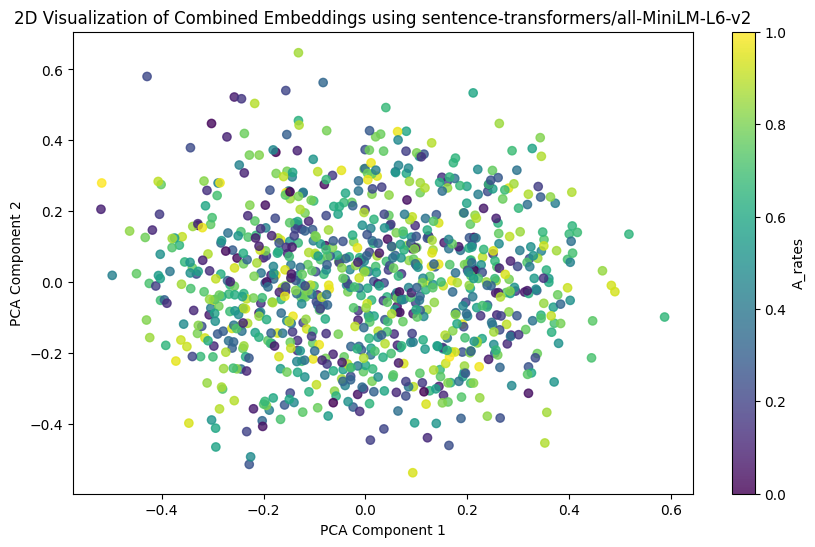

Batches:   0%|          | 0/29 [00:00<?, ?it/s]

Batches:   0%|          | 0/29 [00:00<?, ?it/s]

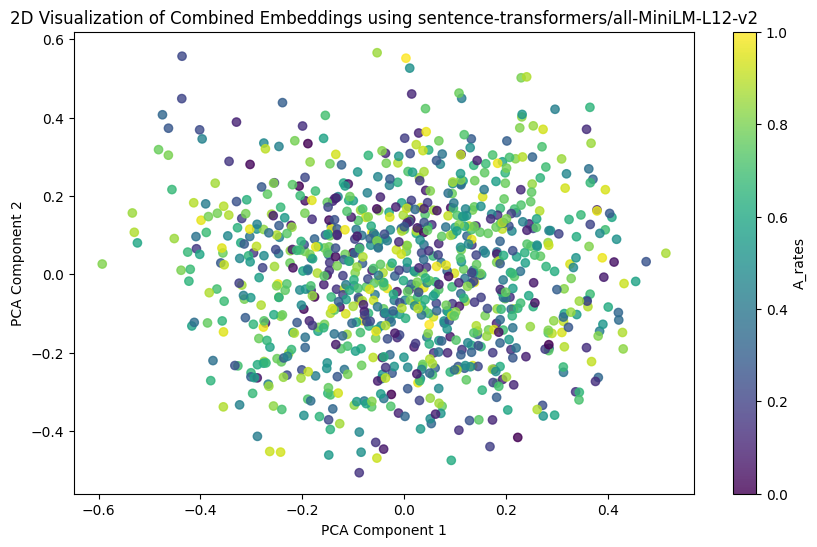

Batches:   0%|          | 0/29 [00:00<?, ?it/s]

Batches:   0%|          | 0/29 [00:00<?, ?it/s]

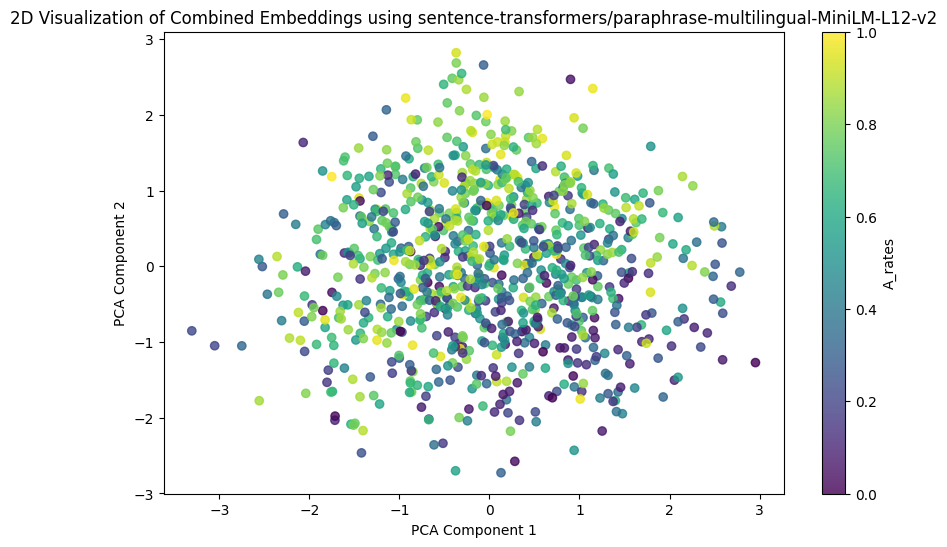

Batches:   0%|          | 0/29 [00:00<?, ?it/s]

Batches:   0%|          | 0/29 [00:00<?, ?it/s]

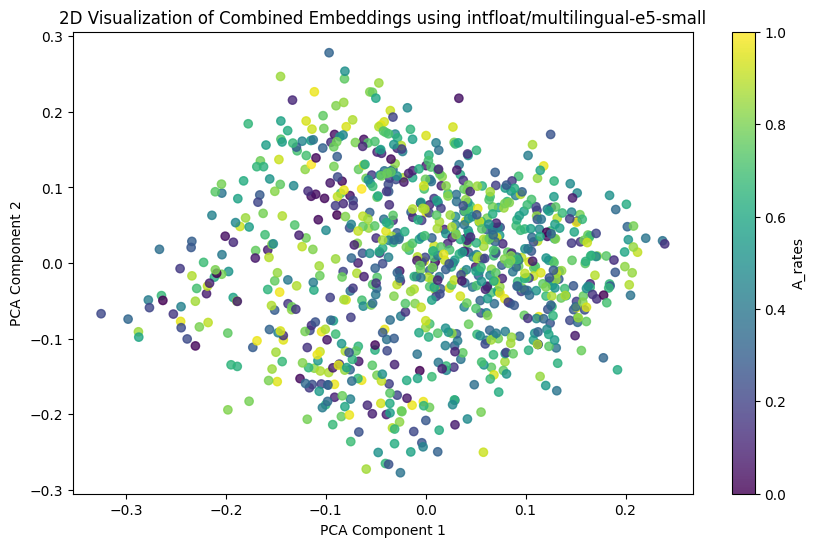

Batches:   0%|          | 0/29 [00:00<?, ?it/s]

Batches:   0%|          | 0/29 [00:00<?, ?it/s]

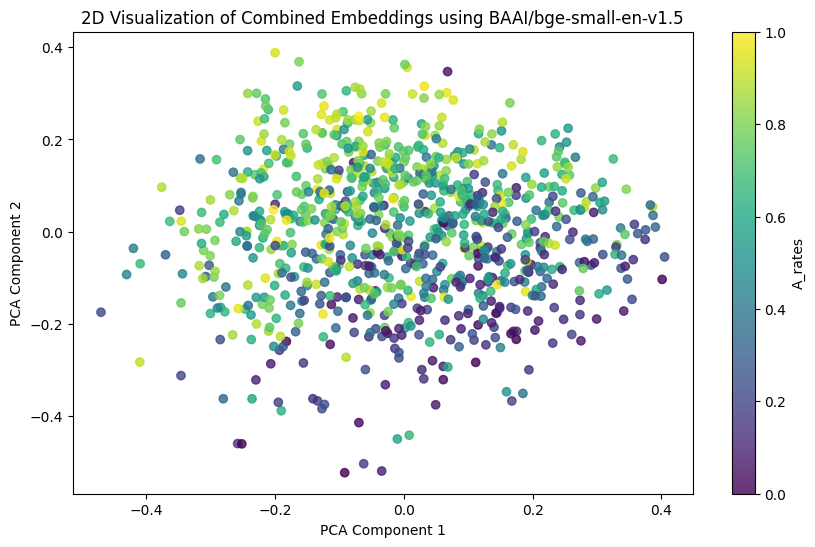

Batches:   0%|          | 0/29 [00:00<?, ?it/s]

Batches:   0%|          | 0/29 [00:00<?, ?it/s]

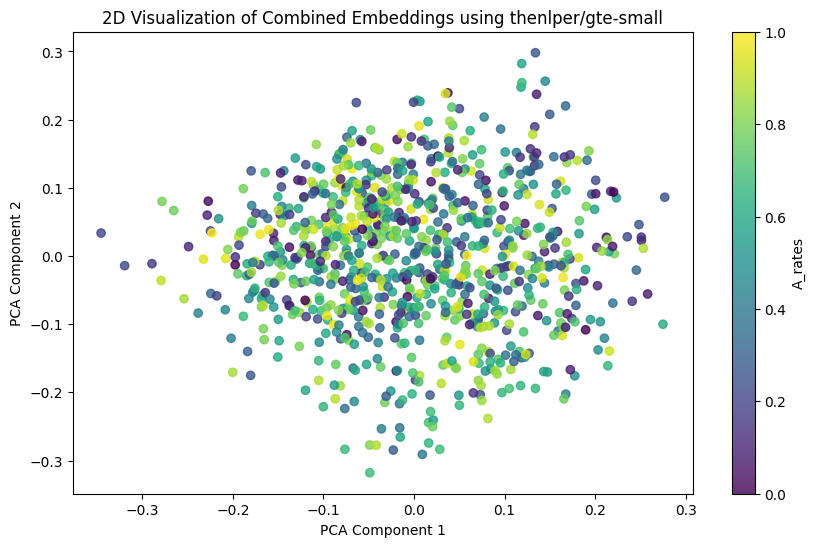

Batches:   0%|          | 0/29 [00:00<?, ?it/s]

Batches:   0%|          | 0/29 [00:00<?, ?it/s]

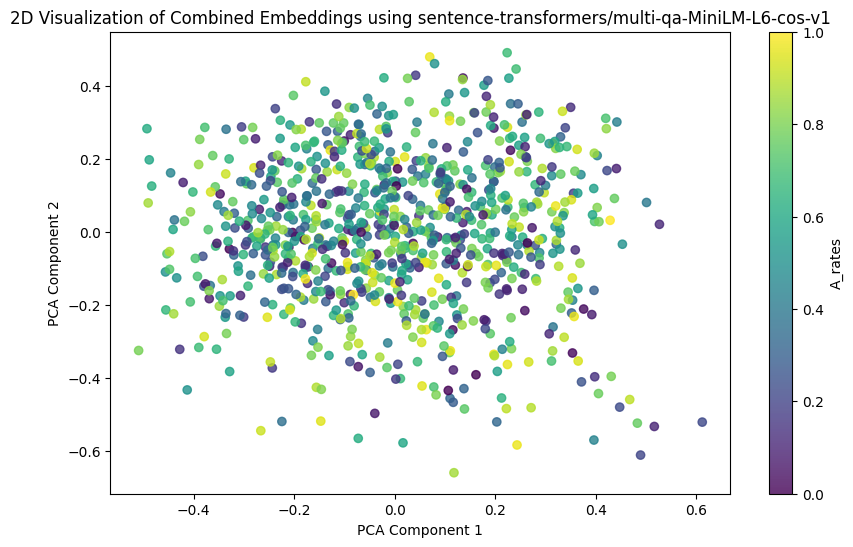

In [24]:
# 2D vizualization

models = [
    'sentence-transformers/all-MiniLM-L6-v2',
    'sentence-transformers/all-MiniLM-L12-v2',
    'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2',
    'intfloat/multilingual-e5-small',
    'BAAI/bge-small-en-v1.5',
    'thenlper/gte-small',
    'sentence-transformers/multi-qa-MiniLM-L6-cos-v1'
]

for llm in models:
  model = SentenceTransformer(llm)
  A_embeddings = encode_column(data, 'A', model)
  B_embeddings = encode_column(data, 'B', model)


  # concatenate embeddings of A and B
  combined_embeddings = np.hstack((A_embeddings, B_embeddings))



  # dimension reduction using PCA
  pca = PCA(n_components=2)
  reduced_embeddings = pca.fit_transform(combined_embeddings)

  #plot
  plt.figure(figsize=(10, 6))

  scatter = plt.scatter(
      reduced_embeddings[:, 0],
      reduced_embeddings[:, 1],
      c=data['A_rates'],
      cmap='viridis',
      alpha=0.8
  )
  plt.colorbar(scatter, label='A_rates')
  plt.title(f'2D Visualization of Combined Embeddings using {llm}')
  plt.xlabel('PCA Component 1')
  plt.ylabel('PCA Component 2')
  plt.show()


In [44]:
selected_words = ['risk', 'loss','losses','bet']

In [45]:
# duplicate data with inversion between A and B
def dup_train(train_data):
  df_flipped = train_data.copy()
  df_flipped[['A', 'B']] = train_data[['B', 'A']]  # החלפת A ו-B
  df_flipped['A_rates'] = 1 - train_data['A_rates']  # חישוב 1 - A_rates


  # add suffixes to problem_num
  original_data = train_data.copy()
  original_data['problem_num'] = train_data['problem_num'].astype(str) + "_original"
  df_flipped['problem_num'] = df_flipped['problem_num'].astype(str) + "_flipped"

  # concatenate dataframes
  df_expanded = pd.concat([original_data, df_flipped], ignore_index=True).sort_values(by=['problem_num'])
  return df_expanded

In [46]:
# create a circular division
def circular_split(data, fold_size, iteration):
    n = len(data)
    start_idx = (iteration * fold_size) % n
    end_idx = start_idx + fold_size
    if end_idx <= n:
        valid_data = data.iloc[start_idx:end_idx]
        train_data = pd.concat([data.iloc[:start_idx], data.iloc[end_idx:]])
    else:
        valid_data = pd.concat([data.iloc[start_idx:], data.iloc[:end_idx % n]])
        train_data = data.iloc[end_idx % n:start_idx]
    return train_data, valid_data


In [47]:
# embedding for one column
def encode_column(data, column_name, model):
    embeddings = model.encode(data[column_name].tolist(), show_progress_bar=True)
    return pd.DataFrame(embeddings, index=data['problem_num'])

In [48]:
# calculate TP-IDF
def compute_tfidf(data, column_name, vocabulary):
    vectorizer = TfidfVectorizer(vocabulary=vocabulary)  # נשתמש רק במילים שנבחרו
    tfidf_matrix = vectorizer.fit_transform(data[column_name])
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=data['problem_num'], columns=[f"{column_name}_tfidf_{word}" for word in vocabulary])
    return tfidf_df

In [30]:
#9-fold cross validation

# constants
num_iterations = 9
fold_size = 100

algorithms = ['GB','XGBoost','Random Forest','SVR']
results_dict = {}
for algorithm in algorithms:
  results_dict[algorithm] = []

llm = SentenceTransformer('BAAI/bge-small-en-v1.5')

for i in range(num_iterations):
    train_data, valid_data = circular_split(data, fold_size, i)
    train_data = dup_train(train_data)
    print(f"Iteration {i+1}:")
    print(f"Train size: {len(train_data)}, Validation size: {len(valid_data)}")

    # embedding
    train_A_embeddings = encode_column(train_data, 'A', llm)
    train_B_embeddings = encode_column(train_data, 'B', llm)
    valid_A_embeddings = encode_column(valid_data, 'A', llm)
    valid_B_embeddings = encode_column(valid_data, 'B', llm)

    # change name of columns
    train_A_embeddings.columns = [f"A_{i}" for i in range(train_A_embeddings.shape[1])]
    train_B_embeddings.columns = [f"B_{i}" for i in range(train_B_embeddings.shape[1])]
    valid_A_embeddings.columns = [f"A_{i}" for i in range(valid_A_embeddings.shape[1])]
    valid_B_embeddings.columns = [f"B_{i}" for i in range(valid_B_embeddings.shape[1])]

    # TP-IDF calculation
    train_A_tfidf = compute_tfidf(train_data, 'A', selected_words)
    train_B_tfidf = compute_tfidf(train_data, 'B', selected_words)
    valid_A_tfidf = compute_tfidf(valid_data, 'A', selected_words)
    valid_B_tfidf = compute_tfidf(valid_data, 'B', selected_words)

    # concatenate embedding and TP-IDF
    train_features = pd.concat([train_A_embeddings, train_B_embeddings, train_A_tfidf, train_B_tfidf], axis=1)
    valid_features = pd.concat([valid_A_embeddings, valid_B_embeddings, valid_A_tfidf, valid_B_tfidf], axis=1)

    # addind column of ground truth
    train_features['A_rates'] = train_data.set_index('problem_num')['A_rates']
    valid_features['A_rates'] = valid_data.set_index('problem_num')['A_rates']

    X_train = train_features.drop(columns=['A_rates'])
    y_train = train_features['A_rates']
    X_valid = valid_features.drop(columns=['A_rates'])
    y_valid = valid_features['A_rates']

    algorithms = ['GB', 'XGBoost', 'Random Forest', 'SVR']
    for algorithm in algorithms:
        if algorithm == 'GB':
            model = GradientBoostingRegressor()
        if algorithm == 'XGBoost':
            model = XGBRegressor()
        if algorithm == 'Random Forest':
            model = RandomForestRegressor(random_state=42)
        if algorithm == 'SVR':
            model = SVR(C=2, epsilon=0.01)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        y_pred = y_pred.clip(0, 1)

        mse = mean_squared_error(y_valid, y_pred)
        results_dict[algorithm].append(mse)
        print(f'Mean Squared Error (MSE) using {algorithm} on Validation Set: {mse}')

print(results_dict)
for key, values in results_dict.items():
    average = sum(values) / len(values) if values else 0
    print(f"Algorithm: {key}, Average: {average}")


Iteration 1:
Train size: 1600, Validation size: 100


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Mean Squared Error (MSE) using GB on Validation Set: 0.03248060350446238
Mean Squared Error (MSE) using XGBoost on Validation Set: 0.040847415834839085
Mean Squared Error (MSE) using Random Forest on Validation Set: 0.03685060490000001
Mean Squared Error (MSE) using SVR on Validation Set: 0.02760396663358449
Iteration 2:
Train size: 1600, Validation size: 100


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Mean Squared Error (MSE) using GB on Validation Set: 0.030896495039563945
Mean Squared Error (MSE) using XGBoost on Validation Set: 0.03451993227235714
Mean Squared Error (MSE) using Random Forest on Validation Set: 0.03708113650000001
Mean Squared Error (MSE) using SVR on Validation Set: 0.028123919708470422
Iteration 3:
Train size: 1600, Validation size: 100


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Mean Squared Error (MSE) using GB on Validation Set: 0.027861373971895302
Mean Squared Error (MSE) using XGBoost on Validation Set: 0.03960080337218039
Mean Squared Error (MSE) using Random Forest on Validation Set: 0.02989726720000001
Mean Squared Error (MSE) using SVR on Validation Set: 0.0263145878424264
Iteration 4:
Train size: 1600, Validation size: 100


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Mean Squared Error (MSE) using GB on Validation Set: 0.04060024765637174
Mean Squared Error (MSE) using XGBoost on Validation Set: 0.04545008820970054
Mean Squared Error (MSE) using Random Forest on Validation Set: 0.04951459540000002
Mean Squared Error (MSE) using SVR on Validation Set: 0.0321033020131191
Iteration 5:
Train size: 1600, Validation size: 100


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Mean Squared Error (MSE) using GB on Validation Set: 0.031006085038886674
Mean Squared Error (MSE) using XGBoost on Validation Set: 0.03909610341494822
Mean Squared Error (MSE) using Random Forest on Validation Set: 0.037929378199999995
Mean Squared Error (MSE) using SVR on Validation Set: 0.026927797686798764
Iteration 6:
Train size: 1600, Validation size: 100


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Mean Squared Error (MSE) using GB on Validation Set: 0.03390192512363543
Mean Squared Error (MSE) using XGBoost on Validation Set: 0.043683984180482326
Mean Squared Error (MSE) using Random Forest on Validation Set: 0.0388724839
Mean Squared Error (MSE) using SVR on Validation Set: 0.03353814037468091
Iteration 7:
Train size: 1600, Validation size: 100


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Mean Squared Error (MSE) using GB on Validation Set: 0.03863443632966348
Mean Squared Error (MSE) using XGBoost on Validation Set: 0.04280005254353535
Mean Squared Error (MSE) using Random Forest on Validation Set: 0.04473957650000001
Mean Squared Error (MSE) using SVR on Validation Set: 0.03343883244644374
Iteration 8:
Train size: 1600, Validation size: 100


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Mean Squared Error (MSE) using GB on Validation Set: 0.0360754320894033
Mean Squared Error (MSE) using XGBoost on Validation Set: 0.04120846109808296
Mean Squared Error (MSE) using Random Forest on Validation Set: 0.03946197310000001
Mean Squared Error (MSE) using SVR on Validation Set: 0.025694396135319816
Iteration 9:
Train size: 1600, Validation size: 100


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Mean Squared Error (MSE) using GB on Validation Set: 0.029454445536370263
Mean Squared Error (MSE) using XGBoost on Validation Set: 0.036883989940327176
Mean Squared Error (MSE) using Random Forest on Validation Set: 0.0360956161
Mean Squared Error (MSE) using SVR on Validation Set: 0.028955267315072978
{'GB': [0.03248060350446238, 0.030896495039563945, 0.027861373971895302, 0.04060024765637174, 0.031006085038886674, 0.03390192512363543, 0.03863443632966348, 0.0360754320894033, 0.029454445536370263], 'XGBoost': [0.040847415834839085, 0.03451993227235714, 0.03960080337218039, 0.04545008820970054, 0.03909610341494822, 0.043683984180482326, 0.04280005254353535, 0.04120846109808296, 0.036883989940327176], 'Random Forest': [0.03685060490000001, 0.03708113650000001, 0.02989726720000001, 0.04951459540000002, 0.037929378199999995, 0.0388724839, 0.04473957650000001, 0.03946197310000001, 0.0360956161], 'SVR': [0.02760396663358449, 0.028123919708470422, 0.0263145878424264, 0.0321033020131191, 0.0

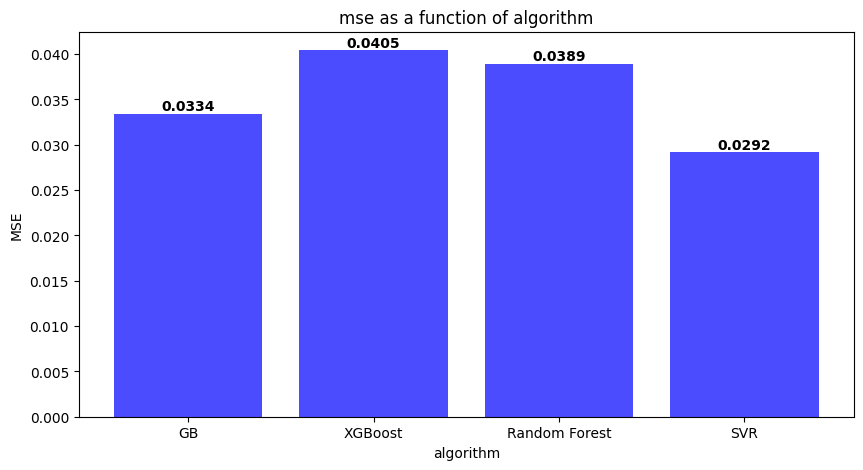

In [31]:
# calculate avg
x_values = list(results_dict.keys())  # המפתחות (ציר X)
y_values = [np.mean(values) for values in results_dict.values()]  # ממוצע של כל רשימה (ציר Y)

#plot avg
plt.figure(figsize=(10, 5))
bars =  plt.bar(x_values, y_values, color='b', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.xlabel('algorithm')
plt.ylabel('MSE')
plt.title('mse as a function of algorithm')
plt.show()

In [49]:
file_path = "test_problems.csv"
test_data = pd.read_csv(file_path)

In [50]:
#generate predictions

# embedding train
llm = SentenceTransformer('BAAI/bge-small-en-v1.5')
train_A_embeddings = encode_column(df_expanded, 'A', llm)
train_B_embeddings = encode_column(df_expanded, 'B', llm)

# change name of columns train
train_A_embeddings.columns = [f"A_{i}" for i in range(train_A_embeddings.shape[1])]
train_B_embeddings.columns = [f"B_{i}" for i in range(train_B_embeddings.shape[1])]

# TP-IDF calculation train
train_A_tfidf = compute_tfidf(df_expanded, 'A', selected_words)
train_B_tfidf = compute_tfidf(df_expanded, 'B', selected_words)

# concatenate embedding and TP-IDF  train
train_features = pd.concat([train_A_embeddings, train_B_embeddings, train_A_tfidf, train_B_tfidf], axis=1)

# addind column of ground truth
train_features['A_rates'] = df_expanded.set_index('problem_num')['A_rates']


X_train = train_features.drop(columns=['A_rates'])
y_train = train_features['A_rates']

model = SVR(C=2, epsilon=0.01)
model.fit(X_train, y_train)

# embedding test
test_A_embeddings = encode_column(test_data, 'A', llm)
test_B_embeddings = encode_column(test_data, 'B', llm)

# change name of columns test
test_A_embeddings.columns = [f"A_{i}" for i in range(test_A_embeddings.shape[1])]
test_B_embeddings.columns = [f"B_{i}" for i in range(test_B_embeddings.shape[1])]

# TP-IDF calculation test
test_A_tfidf = compute_tfidf(test_data, 'A', selected_words)
test_B_tfidf = compute_tfidf(test_data, 'B', selected_words)

# concatenate embedding and TP-IDF  train
test_features = pd.concat([test_A_embeddings, test_B_embeddings, test_A_tfidf, test_B_tfidf], axis=1)

# prediction on the test group
test_data['prediction'] = model.predict(test_features)
test_data['prediction'] = test_data['prediction'].clip(0, 1)

# create an csv file with the results
results = test_data[['problem_num', 'prediction']]
results.to_csv("prediction.csv", index=False, encoding='utf-8-sig')


Batches:   0%|          | 0/57 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]